# Sky Huang

## Research question/interests

**I want to look at the effects of large bodies of water on the air quality, by looking at the level of CO, CO2, NO2, and other chemicals such as benzene** at both coastal and landlocked CBSA zones and comparing them. Furthermore, I will check if asthma levels are significantly different across these two categories. Additionally, I will try to control other variables by only comparing CBSA zones of similar size.I plan to filter the data to isolate coastal and landlocked metro areas, and then compare the air quality levels of these two groups.

## Plan 
1. Filter the data to isolate coastal and landlocked metro areas
2. look for collation between air quality and asthma levels in each group individually
3. check for collation between air quality and asthma levels in both groups combined
4. Analyze the data to see if there is a significant difference in air quality between the two groups



### PM3
One visualization in the EDA has shown that, at least at the state level, large bodies of water does not seem to impact air qualities to a significant degree. However, that may change as I look at each individual CBSA zone and control for loose variables such as population sizes. As such, I do not believe my RQ and plan needs further adjustments at this time.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geoplot as gplt

aqi = pd.concat(pd.read_csv(f"../data/raw/annual_aqi_by_cbsa_{year}.csv") for year in range(2011, 2023))

# aqi2011 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2011.csv")
# aqi2012 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2012.csv")
# aqi2013 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2013.csv")
# aqi2014 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2014.csv")
# aqi2015 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2015.csv")
# aqi2016 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2016.csv")
# aqi2017 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2017.csv")
# aqi2018 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2018.csv")
# aqi2019 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2019.csv")
# aqi2020 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2020.csv")
# aqi2021 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2021.csv")
# aqi2022 = pd.read_csv("../data/raw/annual_aqi_by_cbsa_2022.csv")

concentration = pd.concat(pd.read_csv(f"../data/raw/annual_conc_by_monitor_{year}.csv") for year in range(2011, 2023))
# concentration2011= pd.read_csv("../data/raw/annual_conc_by_monitor_2011.csv")
# concentration2012= pd.read_csv("../data/raw/annual_conc_by_monitor_2012.csv")
# concentration2013= pd.read_csv("../data/raw/annual_conc_by_monitor_2013.csv")
# concentration2014= pd.read_csv("../data/raw/annual_conc_by_monitor_2014.csv")
# concentration2015= pd.read_csv("../data/raw/annual_conc_by_monitor_2015.csv")
# concentration2016= pd.read_csv("../data/raw/annual_conc_by_monitor_2016.csv")
# concentration2017= pd.read_csv("../data/raw/annual_conc_by_monitor_2017.csv")
# concentration2018= pd.read_csv("../data/raw/annual_conc_by_monitor_2018.csv")
# concentration2019= pd.read_csv("../data/raw/annual_conc_by_monitor_2019.csv")
# concentration2020= pd.read_csv("../data/raw/annual_conc_by_monitor_2020.csv")
# concentration2021= pd.read_csv("../data/raw/annual_conc_by_monitor_2021.csv")
# concentration2022= pd.read_csv("../data/raw/annual_conc_by_monitor_2022.csv")

combined = concentration.merge(
    aqi, how="inner", left_on=["Year", "CBSA Name"], right_on=["Year", "CBSA"]
).drop(columns=["CBSA"])
map = gpd.read_file("../data/raw/cb_2018_us_cbsa_500k/cb_2018_us_cbsa_500k.shp")
conbycdsa = combined.groupby(["CBSA Name"])[["Median AQI","Max AQI","90th Percentile AQI"]].mean()
mapcon= map.merge(conbycdsa, how="inner", left_on="NAME", right_on=conbycdsa.index)
mapcon.dropna(inplace=True)
# mapcon.drop(columns=["CSAFP", 
#         "State Code",
#         "County Code",
#         "Local Site Name",
#         "Address",
#         "Latitude",
#         "Longitude",
#         "Datum",
#         "1st Max Non Overlapping Value",
#         "1st NO Max DateTime",
#         "2nd Max Non Overlapping Value",
#         "2nd NO Max DateTime",
#         "Date of Last Change",
#         "Sample Duration",
#         "Site Num",
#         "Pollutant Standard",
#         "Certification Indicator",
#         "Completeness Indicator",
#         "Parameter Code",
#         "1st Max DateTime",
#         "1st Max Value",
#         "2nd Max DateTime",
#         "2nd Max Value",
#         "3rd Max DateTime",
#         "3rd Max Value",
#         "4th Max DateTime",
#         "4th Max Value",
#         "Method Name",], inplace=True)
mapcon

,CSAFP,CBSAFP,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,Median AQI,Max AQI,90th Percentile AQI
1,488,42220,310M400US42220,42220,"Santa Rosa, CA",M1,4081491107,497455304,"POLYGON ((-123.53354 38.76841, -123.52851 38.7...",34.937304,117.446708,52.672414
2,538,46140,310M400US46140,46140,"Tulsa, OK",M1,16238554204,492994165,"POLYGON ((-97.06448 36.68106, -97.06411 36.684...",48.369019,151.400856,77.821076
5,216,14500,310M400US14500,14500,"Boulder, CO",M1,1881290197,36512644,"MULTIPOLYGON (((-105.08257 39.95928, -105.0768...",45.650960,143.240838,82.352531
8,206,18620,310M400US18620,18620,"Corsicana, TX",M2,2614935410,197626092,"POLYGON ((-96.87076 32.08656, -96.77157 32.135...",40.117647,109.279412,60.132353
9,454,39780,310M400US39780,39780,"Red Bluff, CA",M2,7638228750,33767783,"POLYGON ((-123.06543 40.28697, -123.06073 40.2...",43.280645,155.938710,85.200000
...,...,...,...,...,...,...,...,...,...,...,...,...
546,209,17540,310M400US17540,17540,"Clinton, IA",M2,1799818638,39526958,"POLYGON ((-90.89894 41.91853, -90.89807 41.920...",48.073460,108.986967,67.592417
548,222,20020,310M400US20020,20020,"Dothan, AL",M1,4444678880,33248036,"POLYGON ((-86.19348 31.19221, -86.14167 31.192...",36.887097,90.758065,53.225806
549,408,14860,310M400US14860,14860,"Bridgeport-Stamford-Norwalk, CT",M1,1618651428,549293518,"MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ...",43.994458,176.073634,82.345210
551,408,45860,310M400US45860,45860,"Torrington, CT",M2,2384116952,62334525,"POLYGON ((-73.51795 41.67086, -73.51678 41.687...",38.250977,130.840820,55.125977


<AxesSubplot: xlabel='Median AQI', ylabel='State Name'>

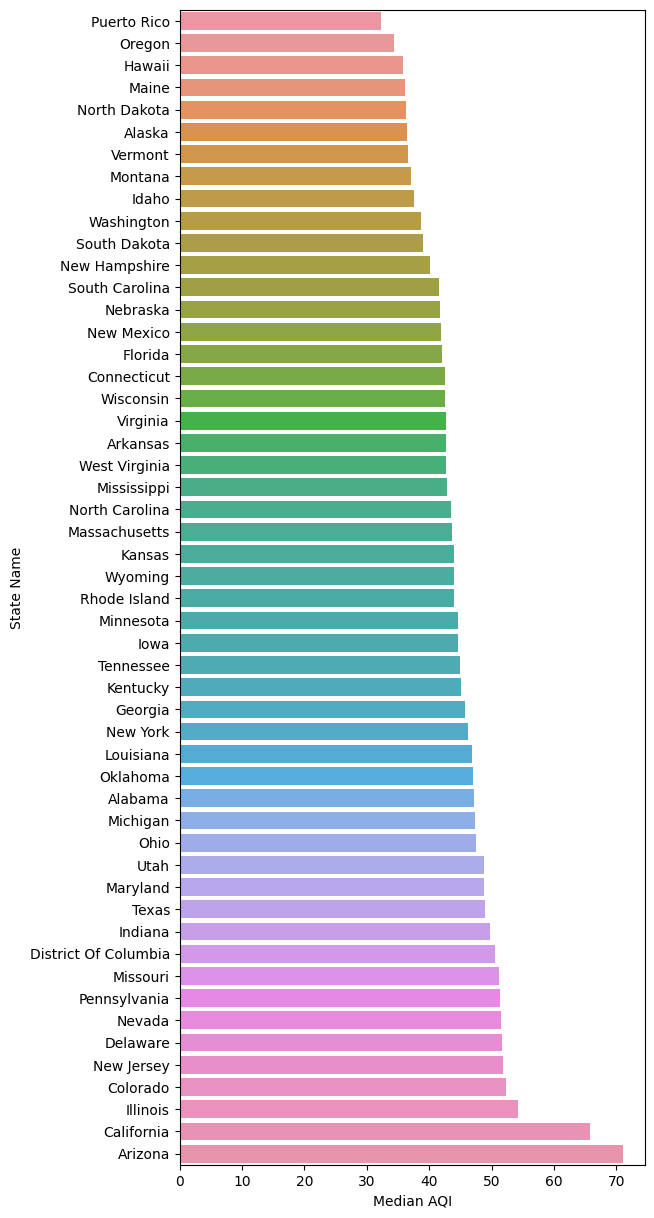

In [28]:
eda = combined.groupby(["State Name"])[["Max AQI","90th Percentile AQI","Median AQI"]].mean()
fig, ax = plt.subplots(figsize=(6, 15))
sns.barplot(data=eda, x="Median AQI", y=eda.index, ax=ax, order=eda.sort_values("Median AQI").index)

<AxesSubplot: xlabel='Landlocked', ylabel='Median AQI'>

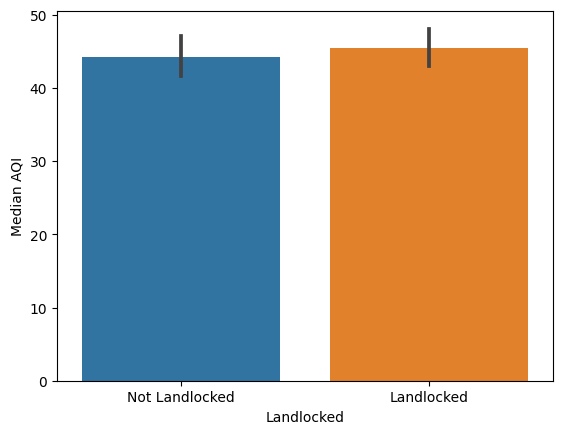

In [27]:
notlandlocked = ['Alaska', 'Hawaii', 'Washington', 'Oregon', 'California', 'Texas', 'Louisiana', 'Alabama', 'Florida', 'Georgia', 'South Carolina', 'North Carolina', 'Virginia', 'Maryland', 'Delaware', 'New Jersey', 'Mississippi', 'New York', 'Connecticut', 'Rhode Island', 'Massachusetts', 'New Hampshire', 'Maine']
li = []
for i in eda.index:
    landlocked = True
    if i in notlandlocked:
        landlocked = False
    if landlocked:
        li.append("Landlocked")
    else:
        li.append("Not Landlocked")
eda["Landlocked"] = li
sns.barplot(data=eda, y="Median AQI", x="Landlocked", orient='v')

/home/costcologist/.pyenv/versions/3.11.1/envs/Data301/lib/python3.11/site-packages/geopandas/geodataframe.py:2323: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4269
Right CRS: EPSG:4326

  return geopandas.overlay(
/home/costcologist/.pyenv/versions/3.11.1/envs/Data301/lib/python3.11/site-packages/geopandas/geodataframe.py:2323: UserWarning: `keep_geom_type=True` in overlay resulted in 13 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  return geopandas.overlay(


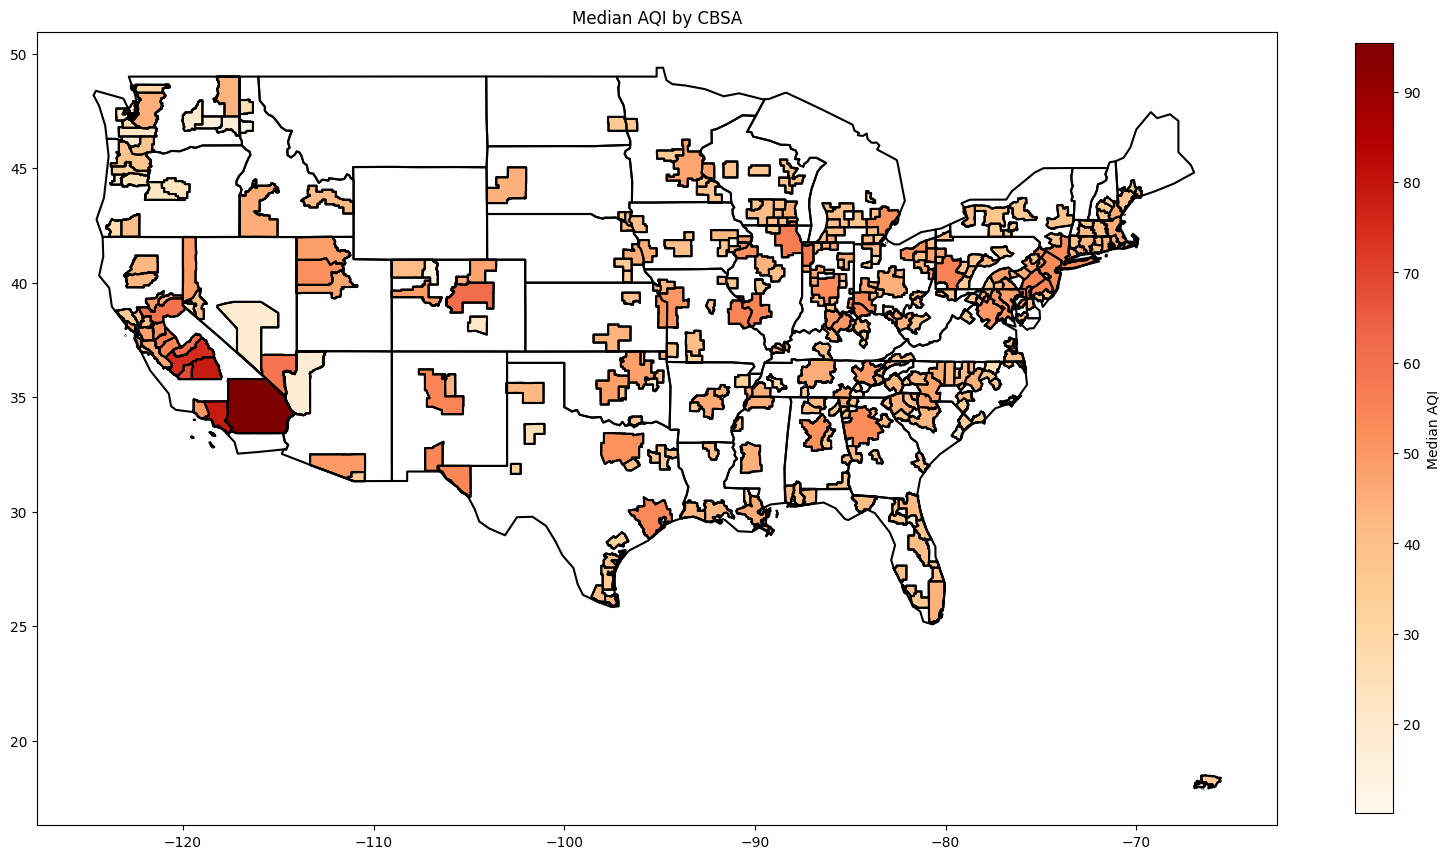

In [22]:
shapedata: gpd.GeoDataFrame = gpd.read_file(gplt.datasets.get_path("contiguous_usa"))
mappoly = mapcon.overlay(shapedata, how="union")
ax = mappoly.boundary.plot(figsize=(20, 20), color="black")
mappoly.plot(ax=ax, column="Median AQI", cmap="OrRd", legend=True, legend_kwds={'label': "Median AQI", 'shrink': 0.5}).title.set_text("Median AQI by CBSA")
